In [2]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [3]:
class AgentState(TypedDict):
    name: str
    age: str
    skill: str
    final: str

In [4]:
def first_node(state: AgentState) -> AgentState:
    """ 첫번째 노드 """
    state["final"] = f"안녕~ {state['name']}, 시스템에 온 것을 환영한다. "
    return state

def second_node(state: AgentState) -> AgentState:
    """ 두번째 노드 """
    state["final"] = state["final"] + f"너는 {state['age']}살 이구먼? "
    return state

def third_node(state: AgentState) -> AgentState:
    """ 세번째 노드 """
    state["final"] = state["final"] + f"너의 스킬은 {state['skill']}이라는걸 다 알고 있으.."
    return state

In [5]:
graph = StateGraph(AgentState)
graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)
graph.add_node("third_node", third_node)

graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.add_edge("second_node", "third_node")
graph.set_finish_point("third_node")

app = graph.compile()

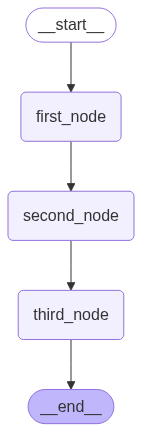

In [6]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
result = app.invoke({"name": "밥", "age": 20, "skill": "Python Machine Learning and LangGraph"})
print(result["final"])

KeyError: 'skill'